# Andrey Filkin (MIPT DREC 3-Year STUDENT B01-106b)
## Homework 3 computional mathematics


### we use a standard difference scheme

$$
\cfrac{f^{n+1}_{i} - 2f^{n}_{i} + f^{n-1}_{i}}{dt^{2}} - \cfrac{f^{n}_{i+1} - 2f^{n}_{i} + f^{n}_{i-1}}{dx^{2}} = 0
$$

### packages

In [105]:
from mpl_toolkits import mplot3d
import numpy as np
from scipy import optimize
import math as m
import matplotlib.colors as mcolors

import matplotlib.pyplot as plt

### functions and variables which would be need for computation

In [65]:
exponential_function = lambda position: np.exp(position / 2)
derivative_function = lambda position: np.exp(position / 2) / 2
boundary_condition_at_zero = lambda time: np.exp(time / 2)
boundary_condition_at_one = lambda time: np.exp((time + 1) / 2)
analytical_solution = lambda position, time: np.exp((time + position) / 2)

width_of_domain = 1
total_time = 1
number_of_spatial_points = 50
number_of_time_steps = 79
spatial_step_size = width_of_domain / number_of_spatial_points
time_step_size = total_time / number_of_time_steps

### Compute next step function

In [85]:
def compute_next_time_step(previous_step, previous_previous_step, dx, dt, n):
    next_step = [0] * len(previous_step)  # Initialize with zeros

    if n == 1: 
        for i in range(1, len(previous_step) - 1):
            next_step[i] = (
                derivative_function(i * dx) / dt
                + (
                    exponential_function((i + 1) * dx)
                    - 2 * exponential_function(i * dx)
                    + exponential_function((i - 1) * dx)
                )
                / (dx**2)
            ) * (dt**2) + exponential_function(i * dx)
    else:  # Subsequent time steps (use finite difference formula)
        for i in range(1, len(previous_step) - 1):
            next_step[i] = (
                (previous_step[i + 1] - 2 * previous_step[i] + previous_step[i - 1])
                * (dt**2)
                / (dx**2)
                + 2 * previous_step[i]
                - previous_previous_step[i]
            )

    # Apply boundary conditions
    next_step[0] = boundary_condition_at_zero(n * dt)
    next_step[-1] = boundary_condition_at_one(n * dt)

    return next_step


### Variables which would be need in next steps

In [86]:
initial_values_at_previous_time_step = [exponential_function(i * spatial_step_size) for i in range(number_of_spatial_points + 1)]
initial_values_at_current_time_step = compute_next_time_step(initial_values_at_previous_time_step, 0, spatial_step_size, time_step_size, 1)
simulation_results = []
simulation_results.append(initial_values_at_previous_time_step)
simulation_results.append(initial_values_at_current_time_step)

In [87]:
for time_step_index in range(2, number_of_time_steps):
    values_at_next_time_step = compute_next_time_step(initial_values_at_current_time_step, initial_values_at_previous_time_step, spatial_step_size, time_step_size, time_step_index)
    simulation_results.append(values_at_next_time_step)
    initial_values_at_previous_time_step = initial_values_at_current_time_step 
    initial_values_at_current_time_step = values_at_next_time_step 

### Visualisation

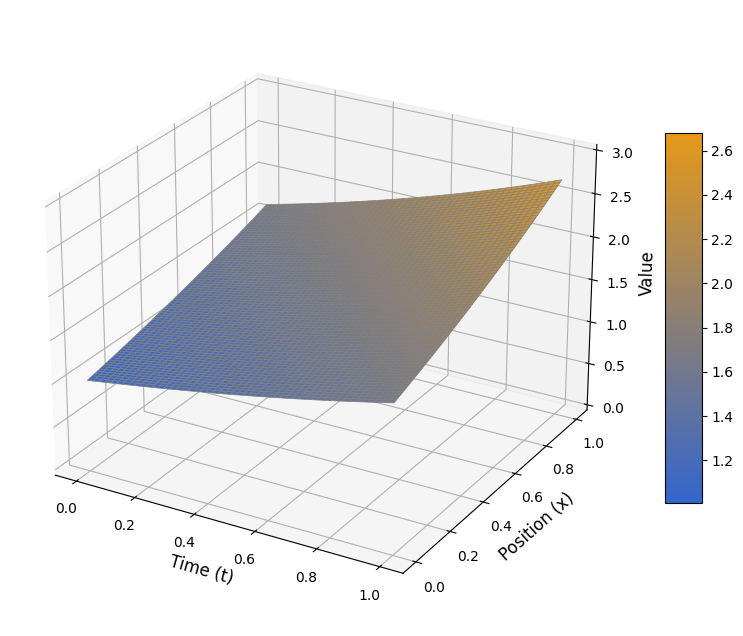

In [88]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

colors = np.array([[0.2, 0.4, 0.8], 
                   [0.9, 0.6, 0.1]])
custom_colormap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)

x_coordinates = np.linspace(0, width_of_domain, len(simulation_results[0]))
y_coordinates = np.linspace(0, total_time, len(simulation_results))
X, Y = np.meshgrid(x_coordinates, y_coordinates)

Z = np.array(simulation_results)

surface_plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=custom_colormap, 
                       linewidth=0.5, edgecolors='gray', antialiased=True) 

ax.set_xlabel('Time (t)', fontsize=12)
ax.set_ylabel('Position (x)', fontsize=12)
ax.set_zlabel('Value', fontsize=12)
ax.set_zlim(0, 3)  

fig.colorbar(surface_plot, shrink=0.6, aspect=10)

ax.view_init(elev=25, azim=-60)

plt.show()

### Real solution

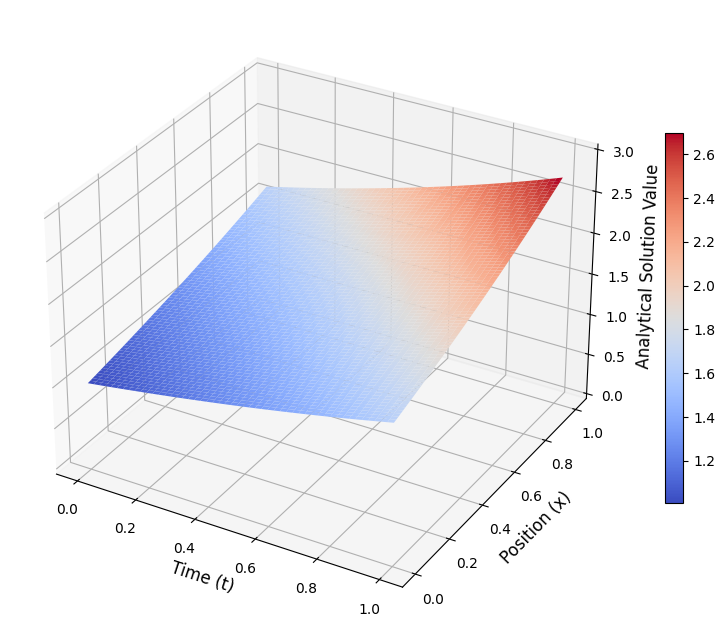

In [90]:
analytical_solution_figure = plt.figure(figsize=(10, 8))  
analytical_solution_axes = analytical_solution_figure.add_subplot(projection='3d')  

position_coordinates = np.linspace(0, width_of_domain, len(simulation_results[0]))  
time_coordinates = np.linspace(0, total_time, len(simulation_results))
position_grid, time_grid = np.meshgrid(position_coordinates, time_coordinates)  

analytical_solution_values = analytical_solution(position_grid, time_grid) 

analytical_solution_axes.set_xlabel('Time (t)', fontsize=12)
analytical_solution_axes.set_ylabel('Position (x)', fontsize=12)
analytical_solution_axes.set_zlabel('Analytical Solution Value', fontsize=12)  

analytical_surface_plot = analytical_solution_axes.plot_surface(
    position_grid, 
    time_grid, 
    analytical_solution_values, 
    rstride=1, 
    cstride=1,
    cmap='coolwarm',  
    linewidth=0, 
    antialiased=True  
)

analytical_solution_axes.set_zlim(0, 3) 

analytical_solution_axes.view_init(elev=30, azim=-60)

analytical_solution_figure.colorbar(analytical_surface_plot, shrink=0.6)

plt.show()

In [93]:
def calculate_max_norm_error(numerical_solution, analytical_solution):
    return max(abs(numerical - analytical) for numerical, analytical in zip(numerical_solution, analytical_solution))

In [94]:
number_of_grid_refinements = 5
initial_number_of_spatial_points = 10
initial_number_of_time_steps = 10

In [95]:
log_of_errors = []
log_of_grid_sizes = []

In [97]:
for refinement_level in range(number_of_grid_refinements):
    number_of_spatial_points = initial_number_of_spatial_points * 2**refinement_level
    number_of_time_steps = initial_number_of_time_steps * 2**refinement_level
    spatial_step_size = width_of_domain / number_of_spatial_points
    time_step_size = total_time / number_of_time_steps

    initial_values_at_previous_time_step = [exponential_function(i * spatial_step_size) for i in range(number_of_spatial_points + 1)]
    initial_values_at_current_time_step = compute_next_time_step(initial_values_at_previous_time_step, 0, spatial_step_size, time_step_size, 1)
    simulation_results = []
    simulation_results.append(initial_values_at_previous_time_step)
    simulation_results.append(initial_values_at_current_time_step)

    for time_step_index in range(2, number_of_time_steps):
        values_at_next_time_step = compute_next_time_step(initial_values_at_current_time_step, initial_values_at_previous_time_step, spatial_step_size, time_step_size, time_step_index)
        simulation_results.append(values_at_next_time_step)
        initial_values_at_previous_time_step = initial_values_at_current_time_step 
        initial_values_at_current_time_step = values_at_next_time_step 
 
    total_error = 0
    for time_step_index in range(number_of_time_steps):
        analytical_solution_at_time_step = [analytical_solution(i * spatial_step_size, time_step_index * time_step_size) for i in range(number_of_spatial_points + 1)]
        total_error += calculate_max_norm_error(simulation_results[time_step_index], analytical_solution_at_time_step)
    average_error = total_error / number_of_time_steps

    log_of_errors.append(ma.log2(average_error))
    log_of_grid_sizes.append(ma.log2(number_of_spatial_points))


In [98]:
def calculate_average(data):
    return sum(data) / len(data)

In [99]:
def calculate_convergence_rate(x_values, y_values):
    numerator = sum((x - calculate_average(x_values)) * y for x, y in zip(x_values, y_values))
    denominator = sum((x - calculate_average(x_values))**2 for x in x_values)
    return numerator / denominator

### Convergance -> result approximately 1 for our schem

Convergence Rate: -0.9934883611694765


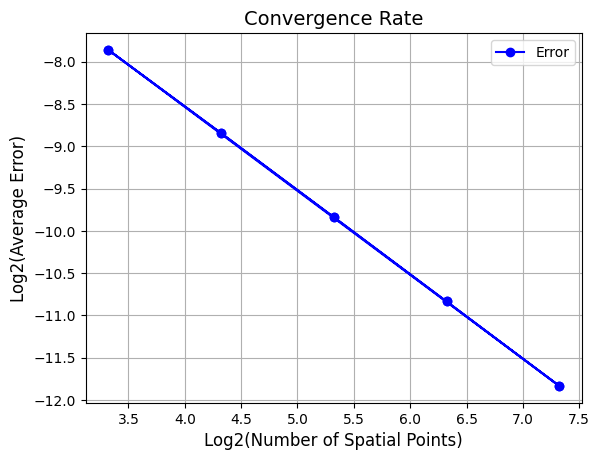

In [100]:
plt.figure() 
plt.plot(log_of_grid_sizes, log_of_errors, color='blue', marker='o', label='Error')
plt.xlabel('Log2(Number of Spatial Points)', fontsize=12)
plt.ylabel('Log2(Average Error)', fontsize=12)
plt.title('Convergence Rate', fontsize=14)
plt.grid(True)
plt.legend()

convergence_rate = calculate_convergence_rate(log_of_grid_sizes, log_of_errors)
print("Convergence Rate:", convergence_rate)

plt.show()